In [14]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import arviz as az
import matplotlib.pyplot as plt
import scipy.linalg as la
import scipy.stats as st
from tqdm import trange

from functions.load_data import load_data
from functions.gibbs_ss_decomp_N_x_error import estimate_hsa
from functions.mcmc_stats import mcmc_stats
from functions.mcmc_plot_posterior import plot_prior_posterior
from functions.sddr_beta import sddr_beta
from functions.mcmc_plot_trace import plot_trace

data = load_data()
T = len(data)
pi = data['pi_cpi_core']
pi_prev = data['pi_cpi_core_prev']
Epi = data['Epi_spf_gdp']
x = data['output_gap_BN']
N = data["N"]
burn_in = 5000
n_samples = 10000


/Users/satoshan/.pyenv/versions/miniforge3-4.10.3-10/envs/numpyro-env/lib/python3.11/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [15]:
priors = {"mu_alpha": 0.7, "sigma_alpha": 0.1, "mu_kappa": 0, "sigma_kappa": 0.1,"mu_theta": 0, "sigma_theta":0.1}
results = estimate_hsa(pi, pi_prev, Epi, x, N, n_burn=burn_in, n_keep=n_samples, priors=priors,include_x_measurement_error=True)
runs = np.column_stack([
    results["alpha"]["draws"],
    results["kappa"]["draws"],
    results["theta"]["draws"],
])
param_names = ["alpha", "kappa", "theta"]

Starting Gibbs sampling: burn-in=5000, keep=10000


Gibbs sampling: 100%|██████████| 15000/15000 [02:40<00:00, 93.34it/s] 


In [16]:
mcmc_stats(runs, burnin=burn_in, param_names=param_names)

/Users/satoshan/GitHub/NKPC_HSA_MCMC/code/functions/mcmc_stats.py:19: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hpdi = az.hdi(traces, hdi_prob=prob)


,mean,median,sd,error,CI(lower),CI(upper),HPDI(lower),HPDI(upper),$\hat R$
alpha,0.757790,0.759569,0.051711,0.000380,0.652903,0.852415,0.656212,0.854942,1.009254
kappa,0.024545,0.025719,0.031471,0.000231,-0.037941,0.084895,-0.038068,0.084574,1.004134
theta,0.003808,0.016310,0.069847,0.000514,-0.128950,0.148461,-0.131546,0.141861,0.941322


In [12]:
plot_trace(runs, burnin=burn_in, param_names=param_names)
prior_specs = {
    "alpha": {"dist": "norm", "loc": 0.7, "scale": 0.1},
    "kappa": {"dist": "norm", "loc": 0.0, "scale": 0.1},
    "theta": {"dist": "norm", "loc": 0.0, "scale": 0.1},
}
plot_prior_posterior(
    runs,
    prior_specs=prior_specs,
    burnin=burn_in,
    param_names=param_names,
)

ValueError: burnin must be smaller than the number of draws.

In [13]:
priors = {"mu_alpha": 0.7, "sigma_alpha": 1, "mu_kappa": 0, "sigma_kappa": 1,"mu_theta": 0, "sigma_theta":1}
results = estimate_hsa(pi, pi_prev, Epi, x, N, n_burn=burn_in, n_keep=n_samples, priors=priors)
runs = np.column_stack([
    results["alpha"]["draws"],
    results["kappa"]["draws"],
    results["theta"]["draws"],
])
param_names = ["alpha", "kappa", "theta"]
mcmc_stats(runs, burnin=burn_in, param_names=param_names)

Starting Gibbs sampling: burn-in=10000, keep=10000


Gibbs sampling:   1%|          | 227/20000 [00:02<03:15, 101.00it/s]


KeyboardInterrupt: 

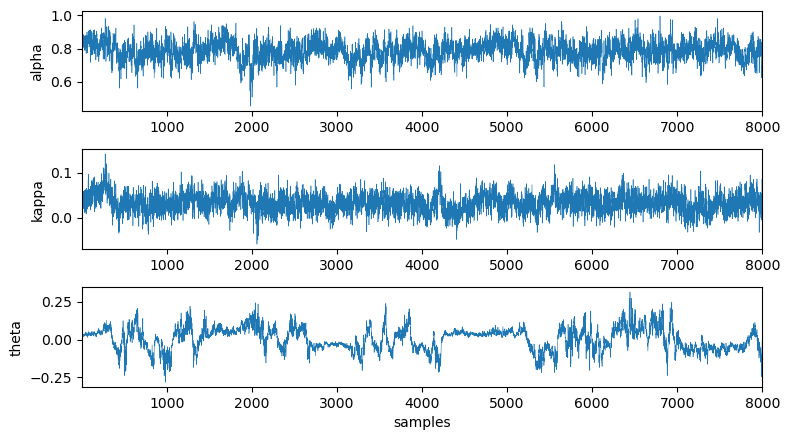

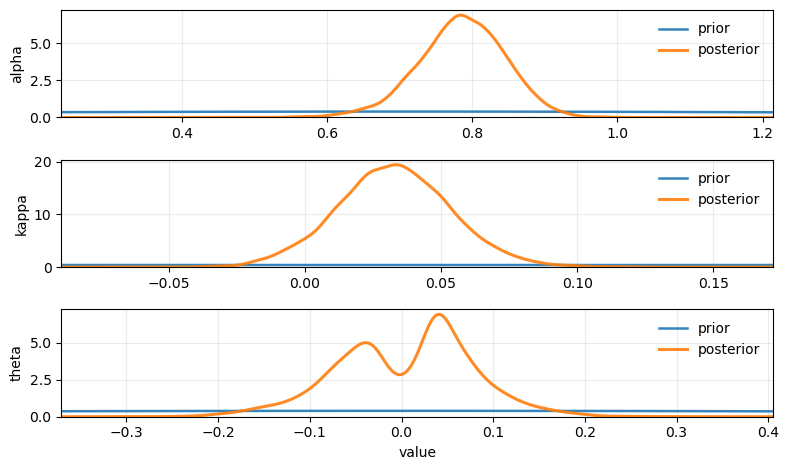

(<Figure size 800x480 with 3 Axes>,
 array([<Axes: ylabel='alpha'>, <Axes: ylabel='kappa'>,
        <Axes: xlabel='value', ylabel='theta'>], dtype=object))

In [ ]:
plot_trace(runs, burnin=burn_in, param_names=param_names)
prior_specs = {
    "alpha": {"dist": "norm", "loc": 0.7, "scale": 1},
    "kappa": {"dist": "norm", "loc": 0.0, "scale": 1},
    "theta": {"dist": "norm", "loc": 0.0, "scale": 1},
}
plot_prior_posterior(
    runs,
    prior_specs=prior_specs,
    burnin=burn_in,
    param_names=param_names,
)

In [ ]:
priors = {"mu_alpha": 0.7, "sigma_alpha": 1000, "mu_kappa": 0, "sigma_kappa": 1000,"mu_theta": 0, "sigma_theta":1000}
results = estimate_hsa(pi, pi_prev, Epi, x, N, n_burn=burn_in, n_keep=n_samples, priors=priors)
runs = np.column_stack([
    results["alpha"]["draws"],
    results["kappa"]["draws"],
    results["theta"]["draws"],
])
param_names = ["alpha", "kappa", "theta"]
mcmc_stats(runs, burnin=burn_in, param_names=param_names)

Starting Gibbs sampling: burn-in=1000, keep=9000


Gibbs sampling: 100%|██████████| 10000/10000 [01:42<00:00, 97.52it/s]
/Users/satoshan/GitHub/NKPC_HSA_MCMC/code/functions/mcmc_stats.py:19: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hpdi = az.hdi(traces, hdi_prob=prob)


,mean,median,sd,error,CI(lower),CI(upper),HPDI(lower),HPDI(upper),$\hat R$
alpha,0.810815,0.813498,0.052770,0.000299,0.699689,0.910198,0.705021,0.914799,0.993487
kappa,0.038549,0.038652,0.020825,0.000118,-0.002920,0.078988,-0.002576,0.079146,1.013072
theta,-0.001403,-0.011756,0.051972,0.000294,-0.108088,0.092033,-0.106241,0.092926,1.053696


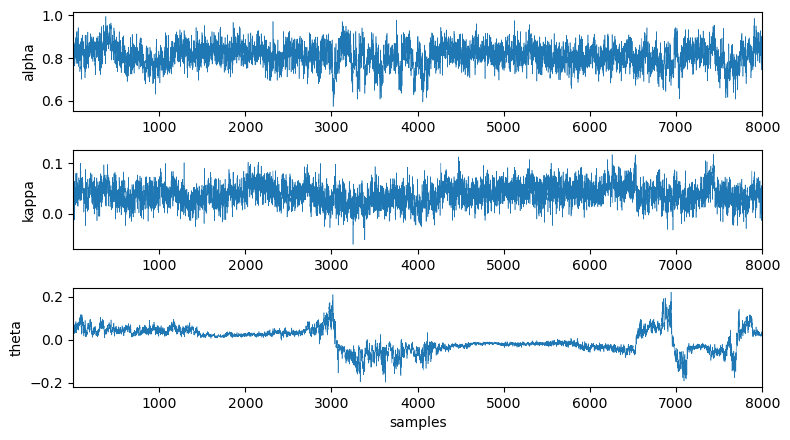

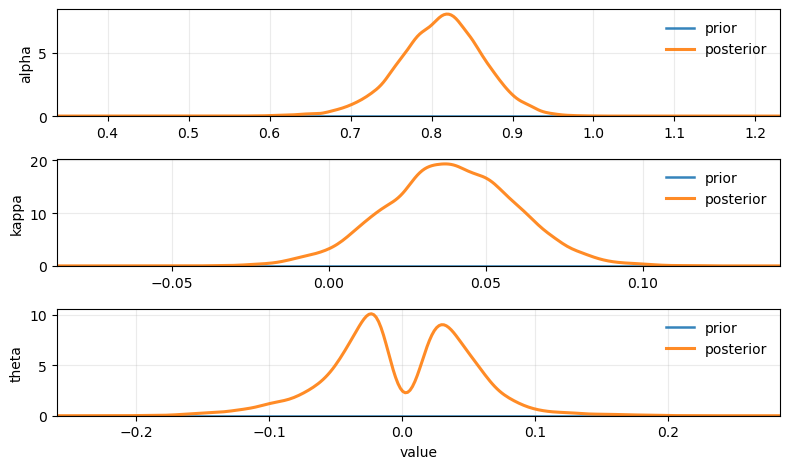

(<Figure size 800x480 with 3 Axes>,
 array([<Axes: ylabel='alpha'>, <Axes: ylabel='kappa'>,
        <Axes: xlabel='value', ylabel='theta'>], dtype=object))

In [ ]:
plot_trace(runs, burnin=burn_in, param_names=param_names)
prior_specs = {
    "alpha": {"dist": "norm", "loc": 0.7, "scale": 1000},
    "kappa": {"dist": "norm", "loc": 0.0, "scale": 1000},
    "theta": {"dist": "norm", "loc": 0.0, "scale": 1000},
}
plot_prior_posterior(
    runs,
    prior_specs=prior_specs,
    burnin=burn_in,
    param_names=param_names,
)